In [38]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1) # Serve per ottenere dei datasets da openml
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [39]:
X = boston.data.to_numpy().astype(float) # Convertiamo un dataframe in un array in modo tale da poter fare la shape
Y = boston.target.to_numpy().astype(float) # stessa cosa

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [40]:
import numpy as np
import torch
np.random.seed(123)
torch.random.manual_seed(123)
idx = np.random.permutation(len(X))

In [41]:
X = X[idx]
Y = Y[idx]

In [42]:
X_training = torch.Tensor(X[50:])
Y_training = torch.Tensor(Y[50:])

X_testing = torch.Tensor(X[:50])
Y_testing = torch.Tensor(Y[:50])

# Perché abbiamo effettuato una permutazione casuale dei dati prima di suddividerli in training e testing set?
Per evitare bias dovuto a eventuale ordinamento iniziale dei dati (es. per prezzo), rendendo la divisione più rappresentativa e il modello più affidabile.

In [43]:
theta = torch.Tensor(13) # Creiamo un tensore di 13 unità
theta_0= torch.Tensor(1) # Tensore di una unità (bias)

#impostiamo required_grad
theta.requires_grad_(True)
theta_0.requires_grad_(True)

theta.data.normal_(0,0.1) # Inizializziamo il tensore con numeri casuali tratti da una distribuzione normale di media 0 e varianza 0.1
theta_0.data.normal_(0,0.1)

print(theta)
print(theta_0)

tensor([-0.0111,  0.0120, -0.0370, -0.0240, -0.1197,  0.0209, -0.0972, -0.0755,
         0.0324, -0.0109,  0.0210, -0.0391,  0.0235], requires_grad=True)
tensor([0.0665], requires_grad=True)


In [44]:
def linear_regression(input,theta,theta_0):
    return input.mul(theta).sum(1)+theta_0
    #.mul(theta) fa un prodotto elemento per elemento tra ogni riga dell'input e theta
    #.sum(1) Dopo il prodotto elemento per elemento, sommi lungo l’asse 1 (cioè per riga) 
    # + theta_0 Aggiungi il bias a ciascuna predizione.


### 📐 Funzione di regressione lineare:

$$
\hat{y}^{(i)} = \sum_{j=1}^{13} x^{(i)}_j \cdot \theta_j + \theta_0
$$

Oppure, in forma più compatta con notazione vettoriale:

$$
\hat{y} = X \cdot \theta + \theta_0
$$

Dove:
- $X$ è la **matrice degli input** (dimensione $N \times 13$)
- $\theta$ è il **vettore dei pesi** (dimensione $13$)
- $\theta_0$ è lo **scalare di bias**
- $\hat{y}$ è il **vettore delle predizioni**


In [45]:
res = X_training.mul(theta)
print (res,res.shape)

tensor([[-6.2912e-04,  4.8145e-01, -2.3694e-01,  ...,  3.7018e-01,
         -1.5513e+01,  8.2946e-02],
        [-6.7404e-04,  0.0000e+00, -9.0930e-02,  ...,  3.7439e-01,
         -1.5130e+01,  3.0899e-01],
        [-7.0198e-03,  0.0000e+00, -3.0088e-01,  ...,  4.4170e-01,
         -1.5513e+01,  1.9409e-01],
        ...,
        [-3.9141e-03,  0.0000e+00, -2.7279e-01,  ...,  4.1225e-01,
         -1.5513e+01,  1.8093e-01],
        [-1.0241e-01,  0.0000e+00, -6.6904e-01,  ...,  4.2487e-01,
         -1.5513e+01,  5.5454e-01],
        [-5.0783e-02,  0.0000e+00, -6.6904e-01,  ...,  4.2487e-01,
         -1.3863e+01,  1.6730e-01]], grad_fn=<MulBackward0>) torch.Size([456, 13])


In [46]:
res=res.sum(1)
print (res.shape)

torch.Size([456])


In [47]:
res = res+theta_0
print (res.shape)

torch.Size([456])


In [48]:
res = X_training.mul(theta).sum(1)+theta_0
print (res.shape)

torch.Size([456])


In [49]:
y = linear_regression(X_training,theta, theta_0)
print(y[:10])

tensor([-20.8190, -23.3360, -24.6247, -31.4600, -27.4998, -28.1950, -27.1047,
        -26.2724, -18.8539, -31.4594], grad_fn=<SliceBackward0>)


In [50]:
print(Y_training[:10])

tensor([32.4000, 29.6000, 20.4000, 12.3000, 19.1000, 14.9000, 17.8000,  8.8000,
        35.4000, 11.5000])


In [51]:
def loss(input, target):
        return ((input-target)**2).mean()

In [52]:
print(loss(y,Y_training))

tensor(2274.0801, grad_fn=<MeanBackward0>)


# È importante che la funzione di loss sia differenziabile rispetto ai parametri del modello? Perché?
Sì, è **fondamentale** che la funzione di **loss sia differenziabile** rispetto ai parametri del modello, perché:

- I modelli si allenano usando **algoritmi di ottimizzazione basati sul gradiente**, come la **discesa del gradiente**.
- Questi algoritmi richiedono di calcolare il **gradiente della loss rispetto ai parametri** (es. $\frac{\partial \text{Loss}}{\partial \theta}$).
- Se la funzione di loss **non è differenziabile**, il gradiente **non può essere calcolato** e il modello **non può aggiornare i suoi parametri** per imparare.
- Librerie come PyTorch utilizzano **autograd**, che funziona solo su operazioni differenziabili per costruire il grafo computazionale e calcolare i gradienti automaticamente.

In sintesi:  
👉 **Senza una loss differenziabile, l’addestramento del modello non è possibile.**

In [53]:
means = X_training.mean(0)
stds = X_training.std(0)
print(means,stds)

tensor([3.5481e+00, 1.1293e+01, 1.1224e+01, 6.1404e-02, 5.5591e-01, 6.2701e+00,
        6.8338e+01, 3.7963e+00, 9.5658e+00, 4.0893e+02, 1.8468e+01, 3.5775e+02,
        1.2820e+01]) tensor([8.4949e+00, 2.3287e+01, 6.9195e+00, 2.4033e-01, 1.1805e-01, 6.9616e-01,
        2.8338e+01, 2.1295e+00, 8.7019e+00, 1.6880e+02, 2.1430e+00, 9.0201e+01,
        7.1928e+00])


In [54]:
X_training_norm = (X_training-means)/stds

In [55]:
print(X_training_norm.mean(0))
print(X_training_norm.std(0))

tensor([ 0.0000e+00,  7.3199e-09,  1.2914e-07,  2.0914e-09,  3.1685e-07,
        -4.2664e-07,  9.5158e-08,  1.2444e-07,  1.7777e-08,  2.1437e-08,
        -2.1332e-07, -1.1503e-07,  1.6731e-07])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000])


In [56]:
X_testing_norm = (X_testing-means)/stds

# Perché è importante normalizzare i dati ? Cosa può succedere se non lo facciamo?
È importante normalizzare i dati perché molti algoritmi di machine learning (come k-NN, SVM, e regressione logistica) sono sensibili alla scala delle variabili. Se non lo facciamo, le feature con valori più grandi possono dominare quelle più piccole, influenzando negativamente l'apprendimento e le prestazioni del modello. Normalizzare aiuta anche a velocizzare la convergenza negli algoritmi basati su gradienti.

In [57]:
lr = 0.1  # Tasso di apprendimento
epochs = 10  # Numero di epoche per l’allenamento

# Passo 1: Normalizziamo i dati 

means = X_training.mean(0)  # Calcola la media di ciascuna feature nel dataset di training
stds = X_training.std(0)    # Calcola la deviazione standard di ciascuna feature

X_training_norm = (X_training - means) / stds  # Normalizzazione dei dati di training
X_testing_norm = (X_testing - means) / stds    # Normalizzazione dei dati di test con le stesse statistiche

# Passo 2: Inizializziamo i pesi come abbiamo visto in precedenza

theta = torch.Tensor(13)  # Inizializza un tensore di 13 pesi (una per ciascuna feature)
theta_0 = torch.Tensor(1)  # Inizializza il bias (intercetta)

theta.normal_(0, 0.01)  # Inizializzazione dei pesi con distribuzione normale (media=0, std=0.01)
theta_0.normal_(0, 0.01)  # Inizializzazione del bias allo stesso modo

theta.requires_grad_(True)  # Abilita il calcolo automatico del gradiente per theta
theta_0.requires_grad_(True)  # Idem per theta_0

for e in range(epochs):
    # Passo 3: Calcoliamo le predizioni 
    y = linear_regression(X_training_norm, theta, theta_0)  # Predizione del modello

    # Passo 4: calcoliamo il valore della loss
    l = loss(y, Y_training)  # Calcolo della funzione di perdita (es. MSE)

    # Passo 5: calcoliamo il gradiente della Loss rispetto a tutti i parametri
    l.backward()  # Backpropagation: calcola i gradienti rispetto ai parametri

    # stampiamo il valore della loss
    print("Epoch: {}, loss: {:0.2f}".format(e, l.item()))  # Visualizzazione della loss per monitoraggio

    # Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr * theta.grad.data)  # Aggiorna i pesi con discesa del gradiente
    theta_0.data.sub_(lr * theta_0.grad.data)  # Aggiorna il bias

    # Azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()  # Reset dei gradienti per theta
    theta_0.grad.data.zero_()  # Reset dei gradienti per theta_0

Epoch: 0, loss: 576.30
Epoch: 1, loss: 356.67
Epoch: 2, loss: 234.86
Epoch: 3, loss: 158.02
Epoch: 4, loss: 108.95
Epoch: 5, loss: 77.55
Epoch: 6, loss: 57.44
Epoch: 7, loss: 44.54
Epoch: 8, loss: 36.25
Epoch: 9, loss: 30.91


# Dai valori assunti dalla loss durante il training, possiamo dire che la rete è arrivata a convergenza? Ha senso provare ad allenare il modello per un numero maggiore di epoche?
Se la loss decresce all’inizio e poi si stabilizza su un valore costante, allora sì, la rete è probabilmente arrivata a convergenza.

Se la loss continua a scendere in modo significativo anche dopo 10 epoche, non ha senso fermarsi: allenare per più epoche potrebbe migliorare le prestazioni.

Se invece la loss non cambia più dopo alcune epoche, aumentare le epoche è inutile: il modello ha già appreso quanto può.

In [58]:
lr = 0.1  # Tasso di apprendimento
epochs = 50  # Numero di epoche per l’allenamento

# Passo 1: Normalizziamo i dati 

means = X_training.mean(0)  # Calcola la media di ciascuna feature nel dataset di training
stds = X_training.std(0)    # Calcola la deviazione standard di ciascuna feature

X_training_norm = (X_training - means) / stds  # Normalizzazione dei dati di training
X_testing_norm = (X_testing - means) / stds    # Normalizzazione dei dati di test con le stesse statistiche

# Passo 2: Inizializziamo i pesi come abbiamo visto in precedenza

theta = torch.Tensor(13)  # Inizializza un tensore di 13 pesi (una per ciascuna feature)
theta_0 = torch.Tensor(1)  # Inizializza il bias (intercetta)

theta.normal_(0, 0.01)  # Inizializzazione dei pesi con distribuzione normale (media=0, std=0.01)
theta_0.normal_(0, 0.01)  # Inizializzazione del bias allo stesso modo

theta.requires_grad_(True)  # Abilita il calcolo automatico del gradiente per theta
theta_0.requires_grad_(True)  # Idem per theta_0

losses = []

for e in range(epochs):
    # Passo 3: Calcoliamo le predizioni 
    y = linear_regression(X_training_norm, theta, theta_0)  # Predizione del modello

    # Passo 4: calcoliamo il valore della loss
    l = loss(y, Y_training)  # Calcolo della funzione di perdita (es. MSE)

    # Passo 5: calcoliamo il gradiente della Loss rispetto a tutti i parametri
    l.backward()  # Backpropagation: calcola i gradienti rispetto ai parametri

    # stampiamo il valore della loss
    losses.append(l.item())

    # Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr * theta.grad.data)  # Aggiorna i pesi con discesa del gradiente
    theta_0.data.sub_(lr * theta_0.grad.data)  # Aggiorna il bias

    # Azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()  # Reset dei gradienti per theta
    theta_0.grad.data.zero_()  # Reset dei gradienti per theta_0

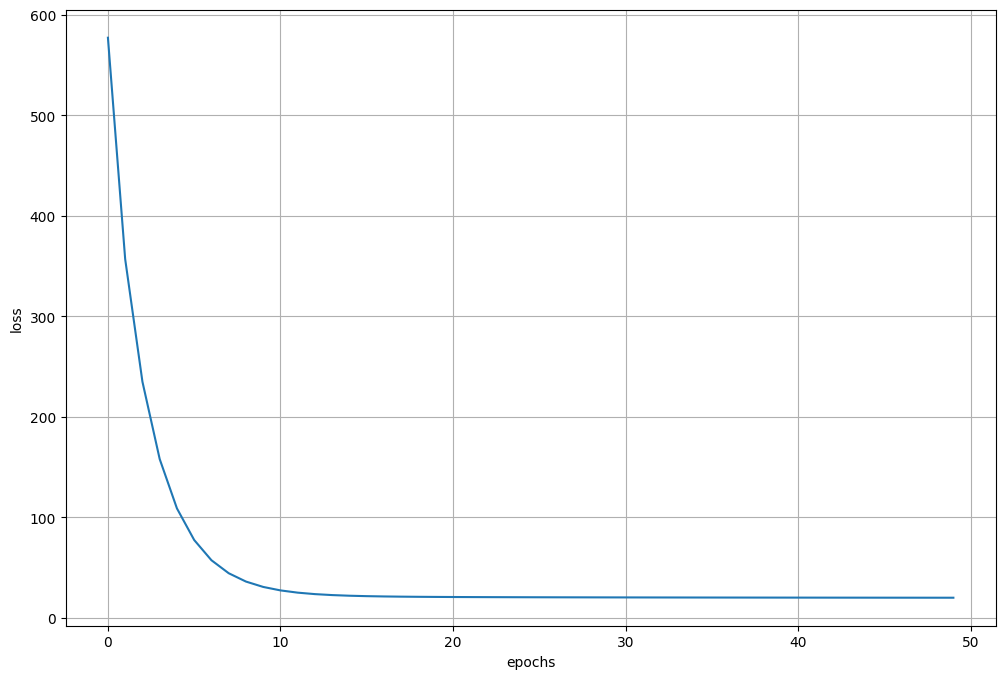

In [59]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [60]:
# Iniziamo calcolando le predizioni del modello dati i pesi allenati

yt =linear_regression(X_testing_norm,theta,theta_0)

# Calcoliamo il valore della loss

print(loss(yt,Y_testing))

tensor(42.8920, grad_fn=<MeanBackward0>)


In [61]:
lr = 0.1  # Tasso di apprendimento
epochs = 50  # Numero di epoche per l’allenamento

# Passo 1: Normalizziamo i dati 

means = X_training.mean(0)  # Calcola la media di ciascuna feature nel dataset di training
stds = X_training.std(0)    # Calcola la deviazione standard di ciascuna feature

X_training_norm = (X_training - means) / stds  # Normalizzazione dei dati di training
X_testing_norm = (X_testing - means) / stds    # Normalizzazione dei dati di test con le stesse statistiche

# Passo 2: Inizializziamo i pesi come abbiamo visto in precedenza

theta = torch.Tensor(13)  # Inizializza un tensore di 13 pesi (una per ciascuna feature)
theta_0 = torch.Tensor(1)  # Inizializza il bias (intercetta)

theta.normal_(0, 0.01)  # Inizializzazione dei pesi con distribuzione normale (media=0, std=0.01)
theta_0.normal_(0, 0.01)  # Inizializzazione del bias allo stesso modo

theta.requires_grad_(True)  # Abilita il calcolo automatico del gradiente per theta
theta_0.requires_grad_(True)  # Idem per theta_0

losses_train = []
losses_test = []

for e in range(epochs):
    # Passo 3: Calcoliamo le predizioni 
    y = linear_regression(X_training_norm, theta, theta_0)  # Predizione del modello

    # Passo 4: calcoliamo il valore della loss
    l = loss(y, Y_training)  # Calcolo della funzione di perdita (es. MSE)

    losses_train.append(l.item())

    # Passo 5: calcoliamo il gradiente della Loss rispetto a tutti i parametri
    l.backward()  # Backpropagation: calcola i gradienti rispetto ai parametri


    # Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr * theta.grad.data)  # Aggiorna i pesi con discesa del gradiente
    theta_0.data.sub_(lr * theta_0.grad.data)  # Aggiorna il bias

    # Azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()  # Reset dei gradienti per theta
    theta_0.grad.data.zero_()  # Reset dei gradienti per theta_0


    #calcololiamo la loss sul test set
    #dato che non dobbiamo calcolare i gradienti li disabilitiamo per risparmiare memoria
    with torch.set_grad_enabled(False):
        y_test = linear_regression(X_testing_norm, theta, theta_0)
        loss_test=loss(y_test,Y_testing)
        losses_test.append(loss_test.item())

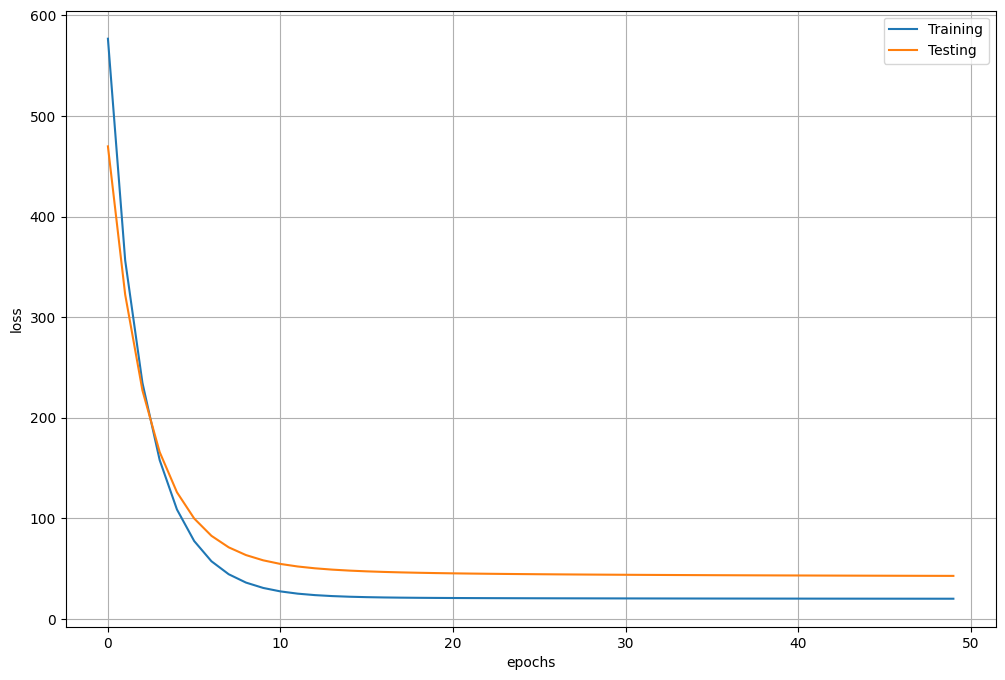

In [62]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses_train)
plt.plot(losses_test)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend(['Training','Testing'])
plt.show()

# Continuare ad allenare il modello per più epoche potrebbe verosimilmente diminuire la loss di test? Perché? 

Sì, se la loss di test converge e continua a diminuire insieme a quella di training, allenare per più epoche potrebbe effettivamente migliorare ulteriormente le prestazioni del modello. Bisogna però monitorare che la loss di test non inizi a peggiorare, altrimenti si rischia l’overfitting.

# API ad Oggetti di PyTorch

La **Domanda 6** chiede:

> Si consideri la trasformazione lineare $ y = A x^T + b $. Perché è necessario trasporre la matrice $ x $?

### Risposta:

La trasposizione della matrice $ x $ è necessaria per far sì che le **dimensioni delle matrici siano compatibili** per la moltiplicazione con la matrice dei pesi $ A $.

Nel dettaglio:

- $ x $ ha dimensioni $ N \times n $, dove $ N $ è il numero di campioni e $ n $ è la dimensionalità di ciascun campione.
- $ A $ ha dimensioni $ m \times n $, dove $ m $ è la dimensione dell’output.

Per poter eseguire la moltiplicazione $ A x^T $, bisogna trasporre $ x $, che diventa $ n \times N $, così che la moltiplicazione $ A (n \times N) $ risulti in una matrice di dimensione $ m \times N $, coerente con l’output $ y $.

In sintesi:
👉 **La trasposizione serve a garantire la compatibilità delle dimensioni tra la matrice dei pesi $ A $ e la matrice degli input $ x $** per poter eseguire correttamente la trasformazione lineare.

In [63]:
from torch import nn 

linear = nn.Linear(20,10)

In [64]:
par = list(linear.parameters())
print(par[0].shape)
print(par[1].shape)

torch.Size([10, 20])
torch.Size([10])


In [65]:
# Costruiamo una matrice di 150 elementi a 20 dimensioni
sample_input= torch.rand((150,20))
# Otteniamo una matrice di 150 elementi a 10 dimensioni

sample_output = linear(sample_input)
print(sample_output.shape)

torch.Size([150, 10])


In [66]:
linreg = nn.Linear(13,1)
z = linreg (X_training_norm)
print(z.shape)

torch.Size([456, 1])


# Funzione di Loss

In [67]:
mse = nn.MSELoss()

In [68]:
print("Loss di PyTorch:",mse(z,Y_training.view(-1,1))) # Alterativa .view(456,1)
print("Loss implementata a mano:",loss(z,Y_training.view(-1,1))) # Alterativa .view(456,1)

Loss di PyTorch: tensor(583.5792, grad_fn=<MseLossBackward0>)
Loss implementata a mano: tensor(583.5792, grad_fn=<MeanBackward0>)


# Definizione di Moduli

In [69]:
class LinearRegressor(nn.Module):
    def __init__(self, in_size, out_size):
        """Costruisce un regressore logistico.
        Input:
            in_size: numero di feature in input (es. 13)
            out_size: numero di elementi in output (es. 1)"""
        super(LinearRegressor, self).__init__() #Richiamo del costruttore della superclasse
        # Questo passo è necessario per abilitare alcuni meccanismi automatici dei moduli di Pytorch
        self.linear = nn.Linear(in_size,out_size)

    def forward(self,x):
        """Definisce come processare l'input x"""
        result = self.linear(x)

        return result

In [70]:
reg = LinearRegressor(13,1)
print(list(reg.parameters()))

[Parameter containing:
tensor([[ 0.1109, -0.2135, -0.2508, -0.2333,  0.0270, -0.0753, -0.0312,  0.2009,
          0.1694, -0.1469, -0.0047, -0.2152, -0.1842]], requires_grad=True), Parameter containing:
tensor([-0.2486], requires_grad=True)]


# Optimizers

In [71]:
lr = 0.1
epochs = 100

means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds

reg = LinearRegressor(13,1)
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(reg.parameters(),lr=lr)

losses_train = []
losses_test = []

for e in range(epochs):
    reg.train()
    output = reg(X_training_norm)
    l = criterion(output.view(-1), Y_training)
    losses_train.append(l.item())

    l.backward()

    optimizer.step()
    optimizer.zero_grad()

    reg.eval()

    with torch.set_grad_enabled(False):
        y_test = reg(X_testing_norm)
        l = criterion(y_test.view(-1), Y_testing)
        losses_test.append(l.item())

# Domanda 7 - Si confronti il codice scritto sopra con il codice scritto in precedenza. Quali sono i vantaggi della nuova versione?

1. ✅ **Versione "moderna"**: usa `nn.Module`, `nn.Linear`, `optimizer` e `MSELoss` di PyTorch.
2. 🛠️ **Versione "manuale"**: costruzione artigianale del modello e dell’ottimizzazione con tensori `theta` e `theta_0`.

---

## ⚖️ Confronto tra i due approcci:

| Aspetto | Versione `nn.Module` | Versione manuale |
|--------|-----------------------|------------------|
| **Modularità** | ✅ Più modulare e riusabile (`LinearRegressor` si può salvare, caricare, combinare) | 🔧 Più difficile da riusare, tutto è hardcoded |
| **Ottimizzazione** | ✅ Usa `torch.optim.SGD` → gestisce bene update, momentum, etc. | 🧮 Gradienti e aggiornamento gestiti a mano |
| **Leggibilità** | ✅ Più compatta e leggibile, soprattutto per chi conosce PyTorch | 👀 Più dettagliata, utile per imparare i meccanismi |
| **Errori comuni evitati** | ✅ `zero_grad()` e `step()` ben strutturati | ⚠️ Rischio di dimenticare azzeramento gradiente |
| **Debug e tracciabilità** | ✅ Facile da ispezionare con `.parameters()` e `state_dict()` | ⚠️ Più macchinosa, difficile da estendere |
| **Performance su larga scala** | ✅ Ottimizzata internamente da PyTorch | ❌ Più lenta, non sfrutta tutte le ottimizzazioni |
| **Flessibilità didattica** | 👎 Più astratta | ✅ Ottima per imparare *come funziona* il deep learning sotto al cofano |

---

## 💬 Quindi... **Quali sono i vantaggi della nuova versione (`nn.Module`)**?

1. **Più compatibile con PyTorch moderno**: puoi salvare il modello, usare GPU, integrare con `DataLoader`, ecc.
2. **Più pulita e concisa**: meno righe di codice, meno possibilità di errori.
3. **Più estendibile**: puoi facilmente aggiungere altri layer, attivazioni, dropout, ecc.
4. **Ottimizzatori avanzati**: puoi cambiare da `SGD` a `Adam` in una riga.
5. **Supporto per tracking e salvataggio**: `model.state_dict()` ti permette di salvare e ricaricare il modello facilmente.

---

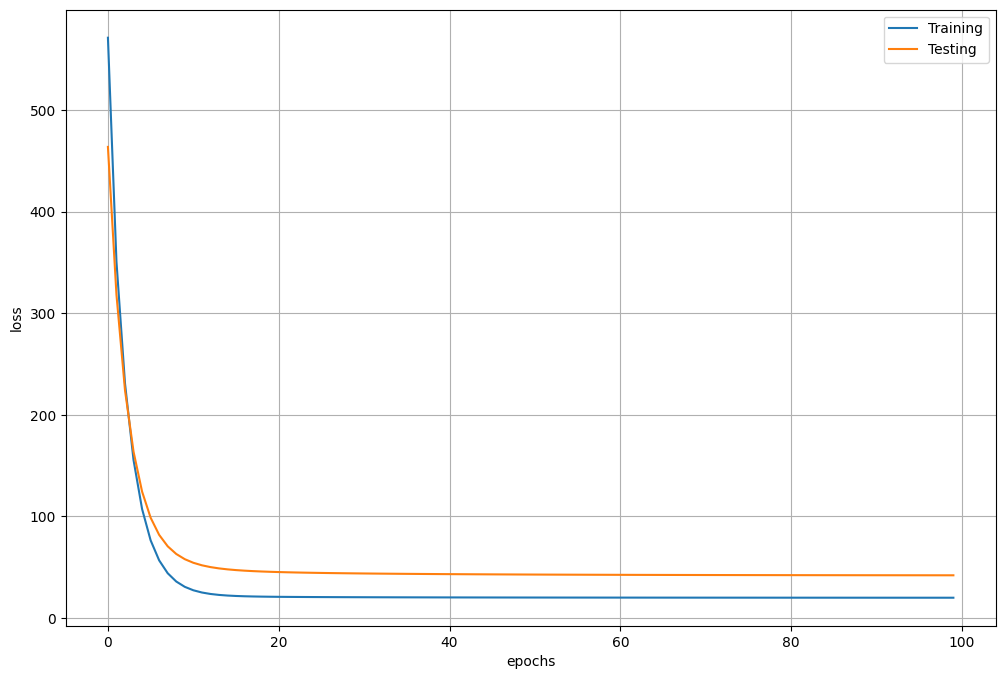

In [72]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(12,8))
plt.plot(losses_train)
plt.plot(losses_test)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend(['Training','Testing'])
plt.show()

# Monitoraggio della procedura di training

In [73]:
from  torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs/test0')

In [74]:
for global_step in range(10):
  writer.add_scalar('loss/train',np.sin(global_step/5*3.14),global_step=global_step)

writer.add_scalar('loss/test',1,global_step=global_step)

for global_step in range(10,20):
  writer.add_scalar('loss/train',np.sin(global_step/5*3.14),global_step=global_step)

writer.add_scalar('loss/test',0.5,global_step=global_step)